# BERT注意力机制可视化

本notebook演示如何从Hugging Face的BERT模型中提取和可视化注意力权重。

In [1]:
# 安装所需的包
# !pip install transformers torch matplotlib seaborn

import torch
from transformers import BertTokenizer, BertModel
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 设置中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

C:\Users\jhyan\.conda\envs\llm-learn\Lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


## 1. 加载预训练的BERT模型

使用`output_attentions=True`参数加载模型，这样模型会在前向传播时返回注意力权重。

In [2]:
# 加载预训练的BERT模型（带注意力权重输出）
model_name = 'bert-base-chinese'  # 使用中文BERT模型
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name, output_attentions=True)  # 设置output_attentions=True

# 示例文本
text = "人工智能正在改变我们的世界"

# 对输入文本进行分词编码
inputs = tokenizer.encode_plus(text, return_tensors='pt', add_special_tokens=True)
input_ids = inputs['input_ids']
attention_mask = inputs['attention_mask']

# 获取token用于可视化
tokens = tokenizer.convert_ids_to_tokens(input_ids[0])
print('分词结果:', tokens)

model.safetensors:   0%|          | 0.00/412M [00:00<?, ?B/s]

分词结果: ['[CLS]', '人', '工', '智', '能', '正', '在', '改', '变', '我', '们', '的', '世', '界', '[SEP]']


## 2. 运行模型并提取注意力权重

通过设置`output_attentions=True`，模型会返回所有层的注意力权重。

In [3]:
# 运行模型
with torch.no_grad():  # 不计算梯度
    outputs = model(input_ids, attention_mask=attention_mask)
    # 获取注意力权重
    attentions = outputs.attentions

# 查看注意力权重的形状和信息
print(f'注意力层数: {len(attentions)}')
print(f'第一层中的注意力头数量: {attentions[0].size(1)}')
print(f'注意力形状 (batch_size, num_heads, sequence_length, sequence_length): {attentions[0].shape}')

注意力层数: 12
第一层中的注意力头数量: 12
注意力形状 (batch_size, num_heads, sequence_length, sequence_length): torch.Size([1, 12, 15, 15])


C:\Users\jhyan\.conda\envs\llm-learn\Lib\site-packages\torch\nn\modules\module.py:1747: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSelfAttention.forward`.
  return forward_call(*args, **kwargs)


## 3. 可视化注意力权重

下面我们将可视化第一层第一个注意力头的权重。

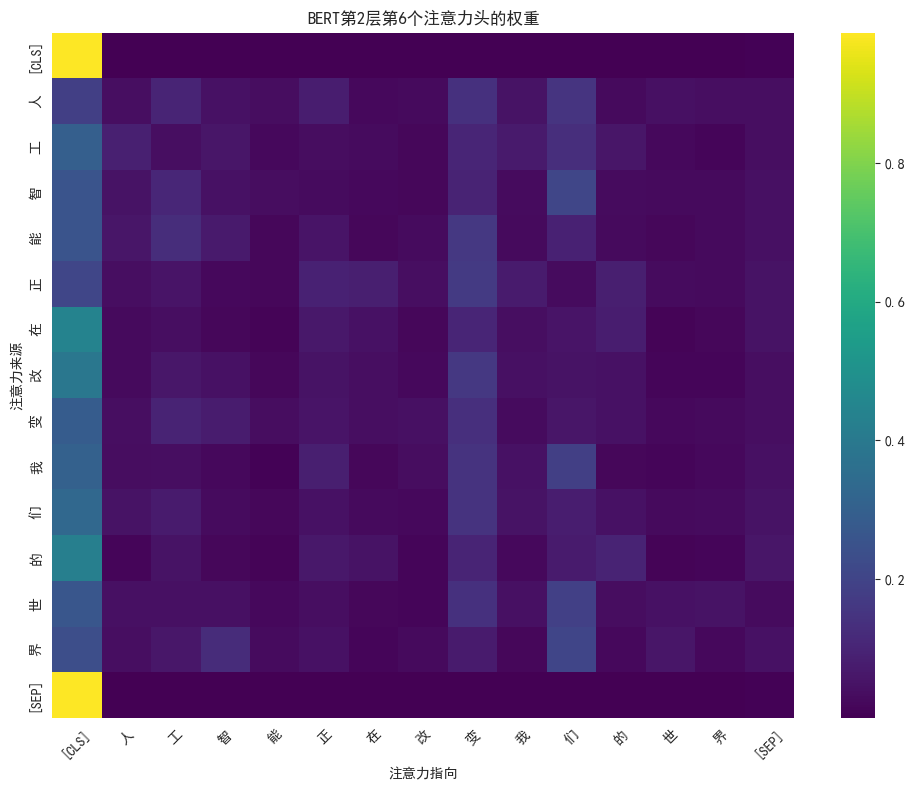

In [15]:
# 可视化第一层第一个注意力头的权重
layer_idx = 1  # 第一层
head_idx = 5# 第一个注意力头

# 获取指定层和头的注意力权重
attention_weights = attentions[layer_idx][0, head_idx].numpy()

# 创建热力图
plt.figure(figsize=(10, 8))
sns.heatmap(attention_weights, xticklabels=tokens, yticklabels=tokens, cmap='viridis')
plt.title(f'BERT第{layer_idx+1}层第{head_idx+1}个注意力头的权重')
plt.xlabel('注意力指向')
plt.ylabel('注意力来源')
plt.xticks(rotation=45)  # 旋转标签以便更好地显示
plt.tight_layout()
plt.show()

## 4. 使用BertViz进行高级可视化

对于更高级的注意力可视化，可以使用BertViz库。

首先安装BertViz：
```
!pip install bertviz
```

然后使用以下代码：

```python
from bertviz import head_view

# 准备BertViz所需的格式
attention_data = {
    'all': {
        'attn': [a.detach().cpu().numpy() for a in attentions]
    }
}

# 显示交互式可视化
head_view(attention_data, tokens)
```

In [25]:
from bertviz import head_view

# 显示交互式可视化
head_view(attentions, tokens)

<IPython.core.display.Javascript object>